In [ ]:
!pip install patchify


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2
import os
import numpy as np
from patchify import patchify
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from simple_unet_model import simple_unet_model

def preprocess_image(image):
    image = image.astype('float32') / 255.0  # Chuẩn hóa giá trị pixel về khoảng từ 0 đến 1
    return image

# Đường dẫn đến thư mục chứa ảnh và mask
image_dir = '/content/drive/MyDrive/dataset/Class'
mask_dir = '/content/drive/MyDrive/dataset/Class_mask'

# Danh sách các tệp ảnh và mask trong thư mục
image_files = os.listdir(image_dir)
mask_files = os.listdir(mask_dir)
image_files.sort()
mask_files.sort()
print(image_files)
print(mask_files)

# Đọc dữ liệu ảnh và mask
all_img_patches = []
all_mask_patches = []

target_size = (256, 256)  # Kích thước đích cho ảnh và mask

for image_file, mask_file in zip(image_files, mask_files):
    # Đường dẫn đầy đủ đến ảnh và mask
    image_path = os.path.join(image_dir, image_file)
    mask_path = os.path.join(mask_dir, mask_file)

    # Đọc ảnh và mask
    image = cv2.imread(image_path)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)  # Đọc mask dưới dạng ảnh xám

    # Chuyển đổi không gian màu từ BGR sang RGB cho ảnh
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Thay đổi kích thước ảnh và mask
    resized_image = cv2.resize(image_rgb, target_size)
    resized_mask = cv2.resize(mask, target_size)

    # Thêm ảnh và mask vào danh sách
    all_img_patches.append(resized_image)
    all_mask_patches.append(resized_mask)

# Chuyển danh sách thành mảng numpy
all_img_patches = np.array(all_img_patches)
all_mask_patches = np.array(all_mask_patches)

print(all_img_patches.shape)
print(all_mask_patches.shape)



['1.png', '10.png', '11.png', '12.png', '13.png', '14.png', '15.png', '16.png', '17.png', '18.png', '19.png', '2.png', '20.png', '21.png', '22.png', '23.png', '24.png', '25.png', '26.png', '27.png', '28.png', '29.png', '3.png', '30.png', '31.png', '33.png', '34.png', '35.png', '36.png', '37.png', '38.png', '39.png', '4.png', '40.png', '41.png', '42.png', '43.png', '44.png', '45.png', '46.png', '47.png', '48.png', '49.png', '5.png', '50.png', '51.png', '52.png', '53.png', '54.png', '55.png', '56.png', '57.png', '58.png', '59.png', '6.png', '60.png', '61.png', '62.png', '63.png', '64.png', '65.png', '67.png', '68.png', '69.png', '7.png', '70.png', '71.png', '72.png', '73.png', '74.png', '75.png', '8.png', '9.png']
['1.png', '10.png', '11.png', '12.png', '13.png', '14.png', '15.png', '16.png', '17.png', '18.png', '19.png', '2.png', '20.png', '21.png', '22.png', '23.png', '24.png', '25.png', '26.png', '27.png', '28.png', '29.png', '3.png', '30.png', '31.png', '33.png', '34.png', '35.png', 

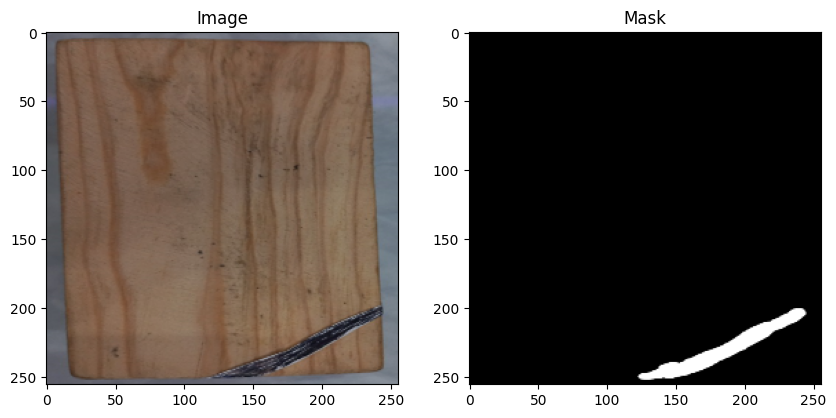

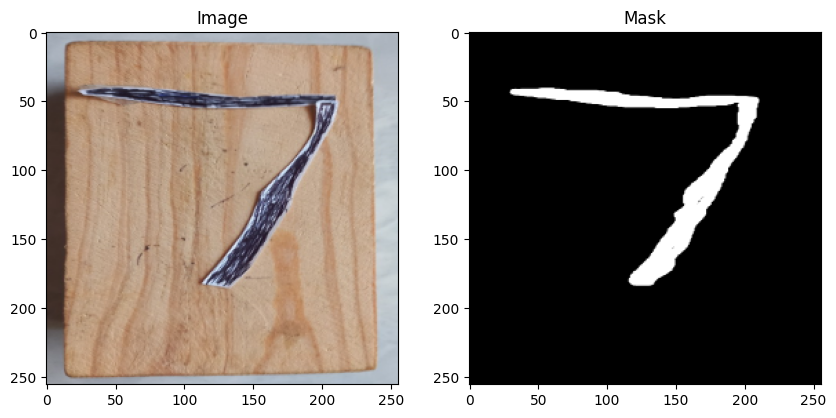

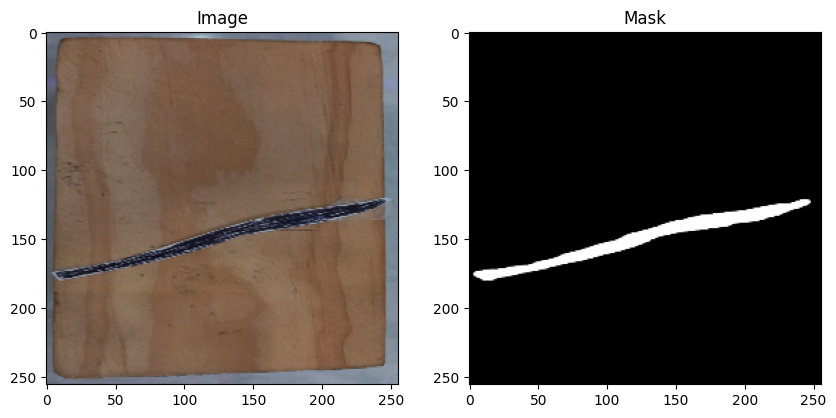

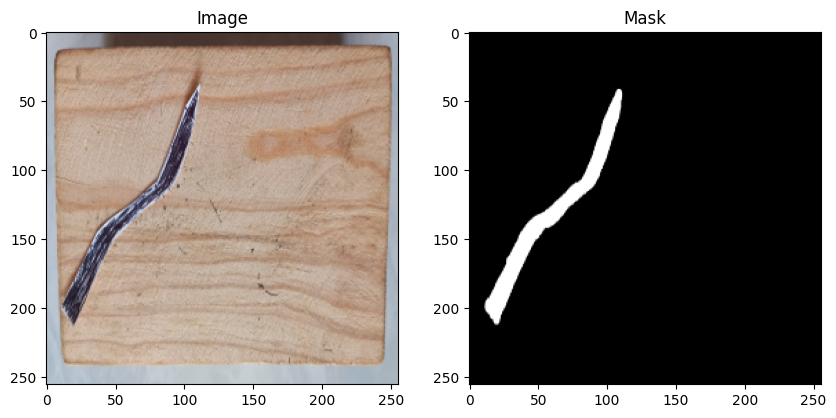

In [ ]:
# Hiển thị ngẫu nhiên một số mẫu ảnh và mask
num_samples = 4
random_indices = np.random.choice(len(all_img_patches), num_samples, replace=False)

for index in random_indices:
    img = all_img_patches[index]
    mask = all_mask_patches[index]

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('Image')

    plt.subplot(1, 2, 2)
    plt.imshow(mask, cmap='gray')
    plt.title('Mask')

    plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Chia train-test
X_train, X_test, y_train, y_test = train_test_split(all_img_patches, all_mask_patches, test_size=0.2, random_state=0)

y_train = np.expand_dims(y_train, axis=-1)

# In kích thước của các tập train-test
print("Kích thước tập train:")
print(X_train.shape)
print(y_train.shape)
print("\nKích thước tập test:")
print(X_test.shape)
print(y_test.shape)


Kích thước tập train:
(58, 256, 256, 3)
(58, 256, 256, 1)

Kích thước tập test:
(15, 256, 256, 3)
(15, 256, 256)


In [ ]:
from simple_unet_model import simple_unet_model
IMG_HEIGHT = 256
IMG_WIDTH = 256
IMG_CHANNELS = 3
model = simple_unet_model(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_19 (Conv2D)             (None, 256, 256, 16  448         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 dropout_9 (Dropout)            (None, 256, 256, 16  0           ['conv2d_19[0][0]']              
                                )                                                           

In [ ]:
print(X_train.shape)
print(X_train.dtype)


(58, 256, 256, 3)
uint8


In [ ]:
seed = 42
img_data_gen_args = {
    'rotation_range': 90,
    'width_shift_range': 0.3,
    'height_shift_range': 0.3,
    'shear_range': 0.5,
    'zoom_range': 0.3,
    'horizontal_flip': True,
    'vertical_flip': True,
    'fill_mode': 'reflect',
    'preprocessing_function': preprocess_image
}

mask_data_gen_args = {
    'rotation_range': 90,
    'width_shift_range': 0.3,
    'height_shift_range': 0.3,
    'shear_range': 0.5,
    'zoom_range': 0.3,
    'horizontal_flip': True,
    'vertical_flip': True,
    'fill_mode': 'reflect',
    'preprocessing_function': preprocess_image
}

image_data_generator = ImageDataGenerator(**img_data_gen_args)
image_data_generator.fit(X_train, augment=True, seed=seed)

mask_data_generator = ImageDataGenerator(**mask_data_gen_args)
mask_data_generator.fit(y_train, augment=True, seed=seed)

image_generator = image_data_generator.flow(X_train, seed=seed)
mask_generator = mask_data_generator.flow(y_train, seed=seed)
valid_img_generator = image_data_generator.flow(X_test, seed=seed)
valid_mask_generator = mask_data_generator.flow(np.expand_dims(y_test, axis=-1), seed=seed)


def my_image_mask_generator(image_generator, mask_generator):
    train_generator = zip(image_generator, mask_generator)
    for (img, mask) in train_generator:
        yield (img, mask)

my_generator = my_image_mask_generator(image_generator, mask_generator)
validation_datagen = my_image_mask_generator(valid_img_generator, valid_mask_generator)

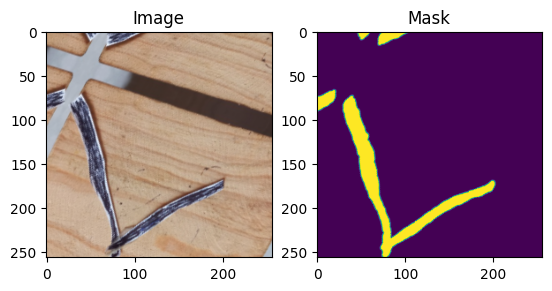

In [ ]:
import matplotlib.cm as cm

x = image_generator.next()
y = mask_generator.next()

for i in range(0, 1):
    image = x[i]
    mask = y[i]

    plt.subplot(1, 2, 1)
    plt.imshow(image)  # Hiển thị ảnh gốc đúng màu sắc (giả định giá trị pixel trong khoảng 0-255)
    plt.title('Image')

    plt.subplot(1, 2, 2)
    plt.imshow(mask[:, :, 0])
    plt.title('Mask')

    plt.show()


In [ ]:
print(image.shape)
print(image.dtype)
print(np.min(image), np.max(image))

(256, 256, 3)
float32
0.06944091 0.9828869


In [ ]:
from keras.optimizers import Adam
batch_size = 16
steps_per_epoch = 3*(len(X_train))//batch_size

model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(my_generator, validation_data=validation_datagen, steps_per_epoch=steps_per_epoch, validation_steps=steps_per_epoch, epochs=20)

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/20
10/10 [==============================] - 15s 1s/step - loss: 0.0372 - accuracy: 0.9779 - val_loss: 0.0478 - val_accuracy: 0.9758
Epoch 2/20
10/10 [==============================] - 9s 1s/step - loss: 0.0591 - accuracy: 0.9751 - val_loss: 0.0381 - val_accuracy: 0.9777
Epoch 3/20
10/10 [==============================] - 12s 1s/step - loss: 0.0533 - accuracy: 0.9755 - val_loss: 0.0392 - val_accuracy: 0.9773
Epoch 4/20
10/10 [==============================] - 12s 1s/step - loss: 0.0413 - accuracy: 0.9781 - val_loss: 0.0521 - val_accuracy: 0.9744
Epoch 5/20
10/10 [==============================] - 12s 1s/step - loss: 0.0513 - accuracy: 0.9761 - val_loss: 0.0424 - val_accuracy: 0.9766
Epoch 6/20
10/10 [==============================] - 12s 1s/step - loss: 0.0541 - accuracy: 0.9758 - val_loss: 0.0660 - val_accuracy: 0.9711
Epoch 7/20
10/10 [==============================] - 11s 1s/step - loss: 0.0471 - accuracy: 0.9768 - val_loss: 0.0437 - val_accuracy: 0.9763
Epoch 8/20
10/10 [===

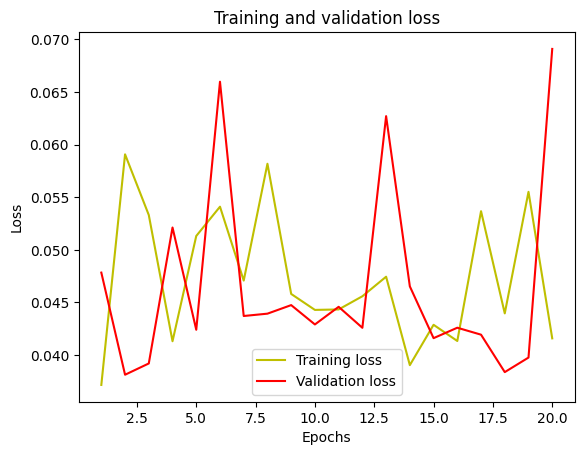

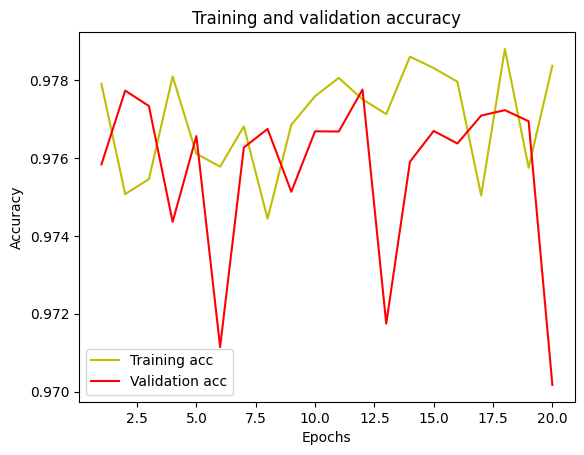

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(X_test)
y_pred_thresholded = (y_pred > 0.5).astype(np.uint8)
y_pred_thresholded = np.squeeze(y_pred_thresholded)

intersection = np.logical_and(y_test, y_pred_thresholded)
union = np.logical_or(y_test, y_pred_thresholded)
iou_score = np.sum(intersection) / np.sum(union)
print("IoU score is: ", iou_score)


1/1 [==============================] - 0s 260ms/step
IoU score is:  0.8309378455030525


In [ ]:
model.save('brick_crack_model.h5')


1/1 [==============================] - 0s 237ms/step


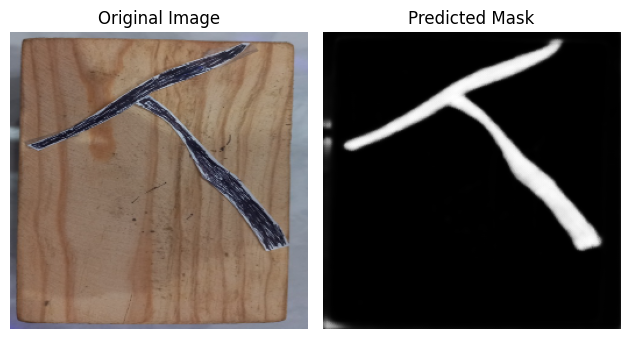

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đường dẫn đến ảnh cần dự đoán
image_path = '20.png'  # Thay đổi đường dẫn đến ảnh mới của bạn

# Đọc ảnh
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Chuyển đổi màu từ BGR sang RGB (nếu cần thiết)

# Thay đổi kích thước ảnh thành (256, 256)
image = cv2.resize(image, (256, 256))

# Chuẩn hóa ảnh
image = image / 255.0

# Mở rộng kích thước của ảnh để phù hợp với đầu vào của mô hình
image = np.expand_dims(image, axis=0)

# Thực hiện dự đoán
prediction_mask = model.predict(image)

# Hiển thị ảnh gốc và ảnh dự đoán
plt.subplot(1, 2, 1)
plt.imshow(image[0])
plt.axis('off')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(prediction_mask[0, :, :, 0], cmap='gray')
plt.axis('off')
plt.title('Predicted Mask')

plt.tight_layout()
plt.show()
